In [5]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class SVM:
    
    def __init__(self,learning_rate=0.01,lambda_param=0.01,n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self,X,y):
        #convert 0's to -1 and otherwise converted to 1
        y_ = np.where(y <= 0, -1,1)
        n_samples, n_features = X.shape
        
        #initialize w and b with zeros
        self.w = np.zeros(n_features)
        self.b = 0
        
        #start grad descent
        for _ in range(self.n_iters):
            #iterate through training data
            for index, x_i in enumerate(X):
                cond = y_[index] * (np.dot(x_i,self.w)-self.b) >= 1
                #if the equation above is greater than or equal to 1, then point is outside of margin and correctly classified 
                if cond:
                    self.w -= self.lr * (2*self.lambda_param*self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i,y_[index]))
                    self.b -= self.lr * y_[index]
        
    def predict(self,X):
        #y_pred = dot(X,weights) - bias
        linear_output = np.dot(X,self.w) - self.b
        return np.sign(linear_output)


In [7]:
#generate dataset and fit data
X, y = datasets.make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
y = np.where(y == 0,-1,1)
classifier = SVM()
classifier.fit(X,y)
print(classifier.w,classifier.b)

[0.50477891 0.27392239] -0.8900000000000006


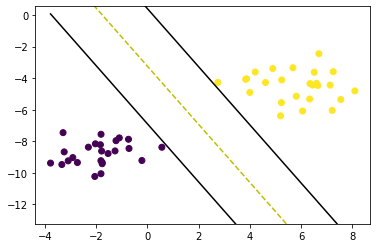

In [10]:
#visualize data
def visualize():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, classifier.w, classifier.b, 0)
     x1_2 = get_hyperplane_value(x0_2, classifier.w, classifier.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, classifier.w, classifier.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, classifier.w, classifier.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, classifier.w, classifier.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, classifier.w, classifier.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize()